In [76]:
import atomium
import math
import mdtraj as md
import nglview
import pybel as bel
import os
from tqdm import tqdm
from rmsd import *
import numpy as np
import deepchem as dc
from deepchem.utils.rdkit_util import *
from pmapper.pharmacophore import Pharmacophore as P
from rdkit import Chem
from rdkit.Chem import AllChem
from pprint import pprint

In [6]:
folder = "SI/"

In [7]:
pdb = atomium.open(folder+"Lig100.pdb")

In [8]:
pdb

<.pdb File>

In [9]:
pdb.title


In [10]:
pdb.model

<Model (0 chains, 1 ligand)>

In [11]:
pdb.model.center_of_mass

array([ 0.80661618, -2.81844187, -0.29879208])

In [12]:
pdb.model.ligand

<bound method getone.<locals>.structure of <Model (0 chains, 1 ligand)>>

In [13]:
pdb.model.ligands()

{<Ligand <1> (d.0)>}

In [17]:
pdb.model.ligand(name='<1>').atoms()

{<Atom 1 (C)>,
 <Atom 2 (C)>,
 <Atom 3 (C)>,
 <Atom 4 (C)>,
 <Atom 5 (N)>,
 <Atom 6 (N)>,
 <Atom 7 (S)>,
 <Atom 8 (H)>}

In [18]:
pdb.model.ligand(name='<1>').translate(10,10,15)

In [22]:
pdb.model.ligand(name='<1>').rotate(math.pi / 2, 'x')

In [24]:
old = md.load(folder+"Lig100.pdb")

In [26]:
pdb.model.save(folder+"Lig100new.pdb")

In [27]:
new = md.load(folder+"Lig100new.pdb")

In [30]:
nglview.show_mdtraj(old)

NGLWidget()

In [31]:
nglview.show_mdtraj(new)

NGLWidget()

In [3]:
mymol = bel.readstring("smi", "CCCC")

In [4]:
mymol.molwt

58.1222

In [5]:
dir(mymol)

['OBMol',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cinfony',
 '_exchange',
 '_gettitle',
 '_repr_html_',
 '_repr_svg_',
 '_settitle',
 'addh',
 'atoms',
 'calccharges',
 'calcdesc',
 'calcfp',
 'charge',
 'clone',
 'conformers',
 'convertdbonds',
 'data',
 'dim',
 'draw',
 'energy',
 'exactmass',
 'formula',
 'localopt',
 'make2D',
 'make3D',
 'molwt',
 'removeh',
 'residues',
 'spin',
 'sssr',
 'title',
 'unitcell',
 'write']

In [6]:
dir(mymol.atoms[0])

['OBAtom',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'atomicmass',
 'atomicnum',
 'cidx',
 'coordidx',
 'coords',
 'degree',
 'exactmass',
 'formalcharge',
 'heavydegree',
 'heavyvalence',
 'heterodegree',
 'heterovalence',
 'hyb',
 'idx',
 'implicitvalence',
 'isotope',
 'partialcharge',
 'residue',
 'spin',
 'type',
 'valence',
 'vector']

In [8]:
mymol.atoms[0].coords

(0.0, 0.0, 0.0)

In [9]:
mymol.make3D()

In [10]:
mymol.atoms[0].coords

(0.912928529926757, -0.08314566716776355, 2.5821499347115007e-05)

In [11]:
md.load(mymol)

TypeError: expected str, bytes or os.PathLike object, not Atom

In [34]:
in_folder = "SI/DockingInput/Ligands/"
out_folder = "SI/DockingInput/Ligands_pdb/"
temp_folder = "SI/DockingInput/temp/"

In [8]:
for file in tqdm(os.listdir(in_folder)):
    os.system("babel -ipdbqt "+ in_folder+file + " -opdb "+out_folder+file[:-2])

100%|██████████| 9121/9121 [03:31<00:00, 43.06it/s]


In [16]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(10)+".pdb"))

NGLWidget()

In [17]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(11)+".pdb"))

NGLWidget()

In [18]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(100)+".pdb"))

NGLWidget()

In [19]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(1000)+".pdb"))

NGLWidget()

In [20]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(1050)+".pdb"))

NGLWidget()

In [22]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(6000)+".pdb"))

NGLWidget()

In [23]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(200)+".pdb"))

NGLWidget()

In [24]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(7000)+".pdb"))

NGLWidget()

In [25]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(9000)+".pdb"))

NGLWidget()

In [28]:
mol = bel.readfile("pdb", out_folder+"Lig"+str(9000)+".pdb").__next__()

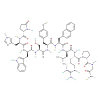

In [29]:
mol

In [31]:
mol.atoms[0].coords

(5.224, 3.262, 6.552)

In [32]:
mol.make3D()

In [33]:
mol.atoms[0].coords

(1.6832551313090918, 0.019474793380942598, -0.24328376920082395)

In [35]:
mol.write("pdb", temp_folder+"Lig9000_changed.pdb")

In [38]:
nglview.show_mdtraj(md.load(temp_folder+"Lig"+str(9000)+"_changed.pdb"))

NGLWidget()

In [39]:
mol.removeh()

In [41]:
mol.write("pdb", temp_folder+"Lig9000_changed.pdb", "overwrite=True")

In [42]:
nglview.show_mdtraj(md.load(temp_folder+"Lig"+str(9000)+"_changed.pdb"))

NGLWidget()

In [43]:
nglview.show_mdtraj(md.load(out_folder+"Lig"+str(9000)+".pdb"))

NGLWidget()

In [10]:
P = [[0, 0], [1, 0], [2, 0]]

In [11]:
Q =[[0, 0], [1, 0], [2, 0]]

In [12]:
U = kabsch(P,Q)

In [13]:
U

array([[1., 0.],
       [0., 1.]])

In [14]:
x,y = zip(*P)

In [15]:
x

(0, 1, 2)

In [16]:
y

(0, 0, 0)

In [17]:
zip([1,2],[3,4],[5,6])

In [19]:
x,y = zip([1,2],[3,4],[5,6])

In [20]:
x

(1, 3, 5)

In [21]:
y

(2, 4, 6)

In [24]:
P = np.array(P)

In [25]:
P

array([[0, 0],
       [1, 0],
       [2, 0]])

In [26]:
c = P.mean(axis = 0)

In [27]:
c

array([1., 0.])

In [28]:
Q = [[0,1],[1,1],[2,1]]

In [29]:
Q = np.array(Q)

In [34]:
q = Q.mean(axis = 0)

In [35]:
Q

array([[0, 1],
       [1, 1],
       [2, 1]])

In [36]:
q

array([1., 1.])

In [37]:
q - c

array([0., 1.])

In [38]:
N = P+(q-c)

In [39]:
N

array([[0., 1.],
       [1., 1.],
       [2., 1.]])

In [40]:
P = N


In [42]:
U = kabsch(P,Q)

In [43]:
U

array([[ 1.00000000e+00, -2.47258163e-16],
       [-1.16150609e-17,  1.00000000e+00]])

In [44]:
np.flatten(P)

AttributeError: module 'numpy' has no attribute 'flatten'

In [56]:
in_folder = "SI/DockingResults/Interface/LigandsOut_0/Ligands/"
out_folder = "SI/DockingResults/Interface/LigandsOut_0/Ligands_pdb/"
temp_folder = "SI/DockingInput/temp/"

in_folder_bef = "SI/DockingInput/Ligands/"
out_folder_bef = "SI/DockingInput/Ligands_pdb/"
temp_folder_bef = "SI/DockingInput/temp/"

In [51]:
for file in tqdm(os.listdir(in_folder)):
    os.system("babel -ipdbqt "+ in_folder+file + " -opdb "+out_folder+file[:-2])

100%|██████████| 8574/8574 [03:54<00:00, 36.56it/s]


In [57]:
t = md.load_pdb(out_folder_bef+"Lig100.pdb")

In [58]:
t.xyz[0]

array([[ 0.1523, -0.1268,  0.0917],
       [ 0.0504, -0.0947,  0.011 ],
       [ 0.0984, -0.3134, -0.0254],
       [-0.094 , -0.2035, -0.1595],
       [ 0.1846, -0.2586,  0.0727],
       [ 0.0137, -0.2056, -0.0627],
       [ 0.1022, -0.4702, -0.0791],
       [ 0.2585, -0.3074,  0.1219]], dtype=float32)

In [65]:
s = md.load_pdb(out_folder+"Lig100.pdb", frame=1)

In [66]:
s.xyz[0]

array([[-2.950e-01, -1.625e-01,  6.150e-02],
       [-3.803e-01, -2.654e-01,  6.790e-02],
       [-4.704e-01, -9.600e-02,  1.890e-01],
       [-6.000e-01, -3.195e-01,  1.708e-01],
       [-3.457e-01, -5.770e-02,  1.337e-01],
       [-4.894e-01, -2.297e-01,  1.448e-01],
       [-5.667e-01,  3.000e-04,  2.834e-01],
       [-3.002e-01,  3.210e-02,  1.446e-01]], dtype=float32)

In [64]:
for file in tqdm(os.listdir(out_folder)):
    os.system("sed -i '/MODEL   /d' "+out_folder+file)

100%|██████████| 8574/8574 [01:32<00:00, 93.15it/s]


In [72]:
mol = load_molecule(out_folder_bef+"Lig100.pdb")

In [81]:
mol = Chem.MolFromPDBFile(out_folder_bef+"Lig1000.pdb")

In [82]:
p = P()
p.load_from_mol(mol)

In [85]:
b = p.get_fp(min_features=4, max_features=4, nbits=2048, activate_bits=2)


In [86]:
print(b)

{1280, 1666, 1538, 642, 1655, 1803, 1548, 1296, 145, 1426, 400, 1175, 544, 417, 805, 1831, 1576, 1065, 1578, 811, 1452, 939, 1577, 1072, 50, 434, 1079, 1594, 1212, 63, 964, 582, 70, 1224, 1352, 460, 1997, 1998, 1486, 1741, 465, 83, 2004, 340, 1238, 1620, 730, 1242, 2012, 987, 1631, 95, 482, 1635, 357, 488, 232, 882, 1652, 887, 376, 761, 1530, 1533, 1790, 1023}


In [96]:
 Final_coords = md.load_pdb(out_folder+"Lig8530.pdb", frame = 0)

In [97]:
a = np.array([[1,2],[3,4]])

In [99]:
x = np.array([5,6])

In [100]:
y = np.ndarray.flatten(a)

In [101]:
y

array([1, 2, 3, 4])

In [104]:
np.concatenate([x,y])

array([5, 6, 1, 2, 3, 4])

In [103]:
x

array([5, 6])

In [105]:
try:
    x = 5
except:
    print("la")
print(x)

5
